<a href="https://colab.research.google.com/github/stephanofer/analisis-datos-hoteles/blob/main/analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

df_datos = pd.read_csv('data/datos.csv')

In [ ]:
print(df_datos.head().to_markdown(index=False, numalign="left", stralign="left"))

| Nombre Comercial   | Dirección                             | Distrito      | Clase   | Categoria   | Nro. Habitaciones   | Nro. Camas   |
|:-------------------|:--------------------------------------|:--------------|:--------|:------------|:--------------------|:-------------|
| Milagritos         | VIA Mza. C Lote. 10 Urb. Santa Lucila | WANCHAQ       | Hostal  | 1           | 14                  | 14           |
| Apu Pirwayani      | AV. De La Cultura 1155                | SAN SEBASTIAN | Hotel   | 2           | 23                  | 30           |
| El Sauce           | CLLE Ventiderio S/N 00                | OLLANTAYTAMBO | Hostal  | 3           | 8                   | 17           |
| Tornado            | JR. Conchatupa S/N                    | URUBAMBA      | Hotel   | 3           | 34                  | 43           |
| Antawasi Hotel     | CLLE Inticcahuarina 621               | CUSCO         | Hotel   | 2           | 24                  | 30           |


In [ ]:
print(df_datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nombre Comercial   421 non-null    object 
 1   Dirección          422 non-null    object 
 2   Distrito           422 non-null    object 
 3   Clase              422 non-null    object 
 4   Categoria          422 non-null    int64  
 5   Nro. Habitaciones  415 non-null    float64
 6   Nro. Camas         414 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 23.2+ KB
None


In [ ]:
print(df_datos.describe().to_markdown(numalign="left", stralign="left"))

|       | Categoria   | Nro. Habitaciones   | Nro. Camas   |
|:------|:------------|:--------------------|:-------------|
| count | 422         | 415                 | 414          |
| mean  | 2.44787     | 28.0699             | 43.9686      |
| std   | 0.888503    | 24.0642             | 43.119       |
| min   | 1           | 6                   | 6            |
| 25%   | 2           | 16                  | 22           |
| 50%   | 2           | 21                  | 33.5         |
| 75%   | 3           | 31                  | 48.75        |
| max   | 5           | 203                 | 514          |


<ipython-input-3-9cf3c96b17f5>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Métrica", y="Cantidad", data=datos_totales, palette="viridis")


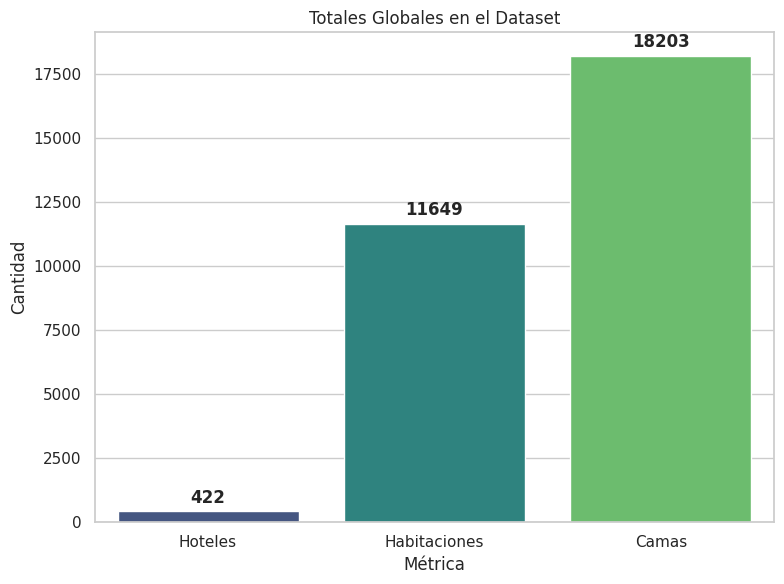

In [ ]:
total_hoteles = len(df_datos)
total_habitaciones = df_datos["Nro. Habitaciones"].sum()
total_camas = df_datos["Nro. Camas"].sum()

datos_totales = pd.DataFrame({
    "Métrica": ["Hoteles", "Habitaciones", "Camas"],
    "Cantidad": [total_hoteles, total_habitaciones, total_camas]
})

sns.set(style="whitegrid")

plt.figure(figsize=(8,6))
ax = sns.barplot(x="Métrica", y="Cantidad", data=datos_totales, palette="viridis")

for i, row in datos_totales.iterrows():
    ax.text(i, row["Cantidad"] + max(datos_totales["Cantidad"])*0.01, f'{int(row["Cantidad"])}',
            ha='center', va='bottom', fontweight='bold')

plt.title("Totales Globales en el Dataset")
plt.xlabel("Métrica")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

<ipython-input-6-0ebd419ba7af>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_hoteles, x="Cantidad_Hoteles", y="Distrito", palette="viridis")


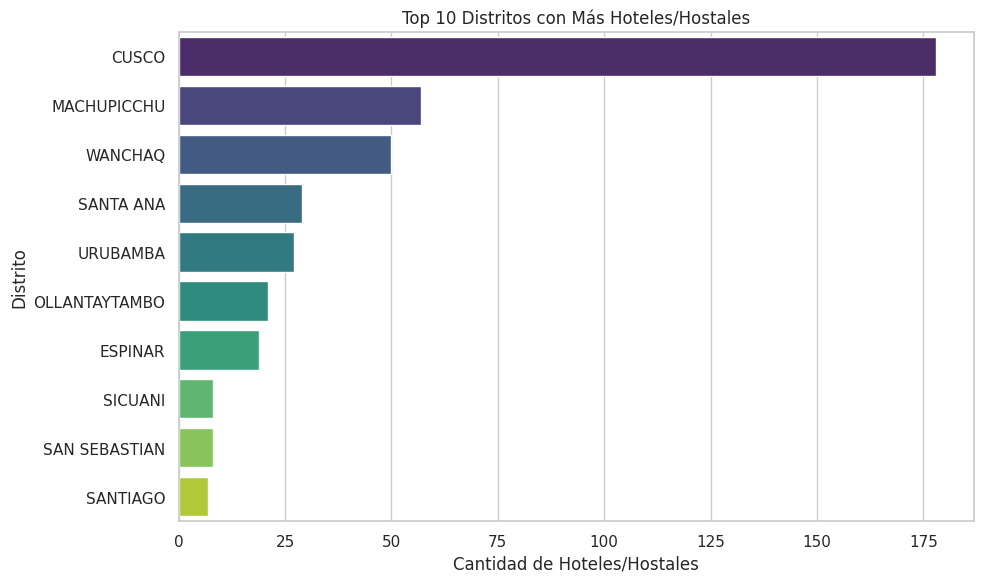

In [ ]:
hoteles_por_distrito = df_datos["Distrito"].value_counts().reset_index()
hoteles_por_distrito.columns = ["Distrito", "Cantidad_Hoteles"]

top_hoteles = hoteles_por_distrito.head(10)

capacidad_por_distrito = df_datos.groupby("Distrito")["Nro. Camas"].sum().reset_index()
capacidad_por_distrito = capacidad_por_distrito.sort_values("Nro. Camas", ascending=False)

top_capacidad = capacidad_por_distrito.head(10)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=top_hoteles, x="Cantidad_Hoteles", y="Distrito", palette="viridis")
plt.title("Top 10 Distritos con Más Hoteles/Hostales")
plt.xlabel("Cantidad de Hoteles/Hostales")
plt.ylabel("Distrito")
plt.tight_layout()
plt.show()

<ipython-input-7-adaf9530e2c2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_capacidad, x="Nro. Camas", y="Distrito", palette="magma")


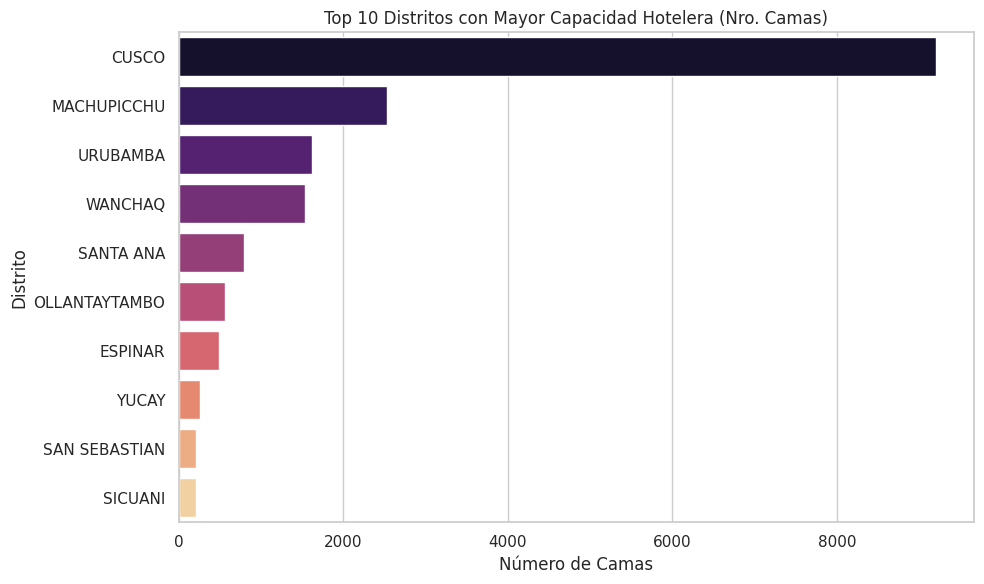

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_capacidad, x="Nro. Camas", y="Distrito", palette="magma")
plt.title("Top 10 Distritos con Mayor Capacidad Hotelera (Nro. Camas)")
plt.xlabel("Número de Camas")
plt.ylabel("Distrito")
plt.tight_layout()
plt.show()

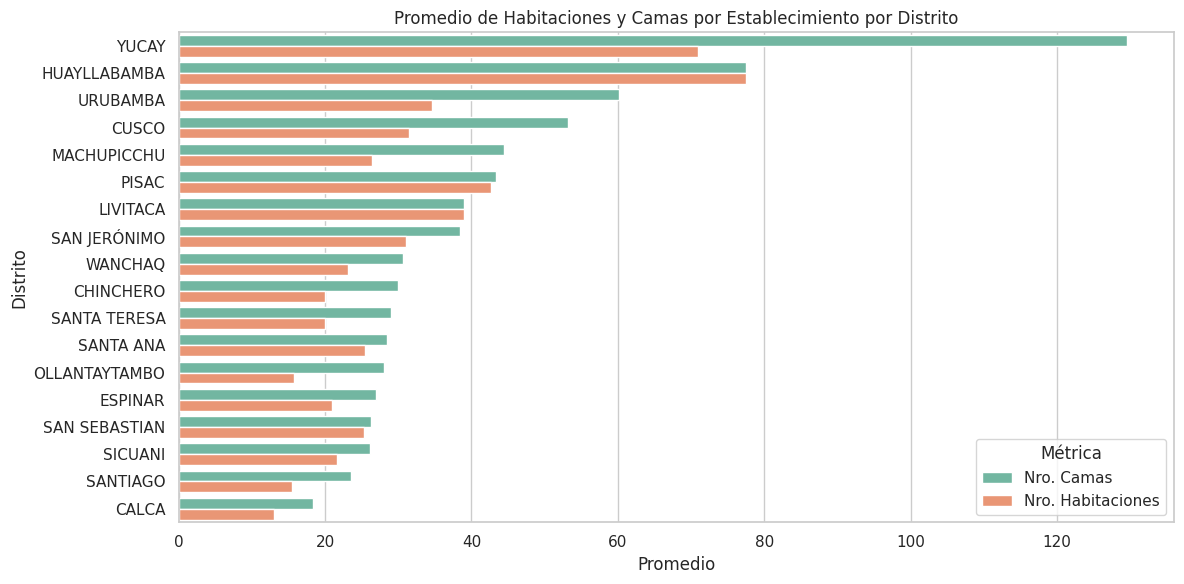

In [ ]:

avg_metrics = df_datos.groupby("Distrito")[["Nro. Habitaciones", "Nro. Camas"]].mean().reset_index()

avg_metrics_melt = avg_metrics.melt(id_vars="Distrito",
                                    var_name="Métrica",
                                    value_name="Promedio")

avg_metrics_melt = avg_metrics_melt.sort_values("Promedio", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_metrics_melt, x="Promedio", y="Distrito", hue="Métrica", palette="Set2")
plt.title("Promedio de Habitaciones y Camas por Establecimiento por Distrito")
plt.xlabel("Promedio")
plt.ylabel("Distrito")
plt.legend(title="Métrica")
plt.tight_layout()
plt.show()

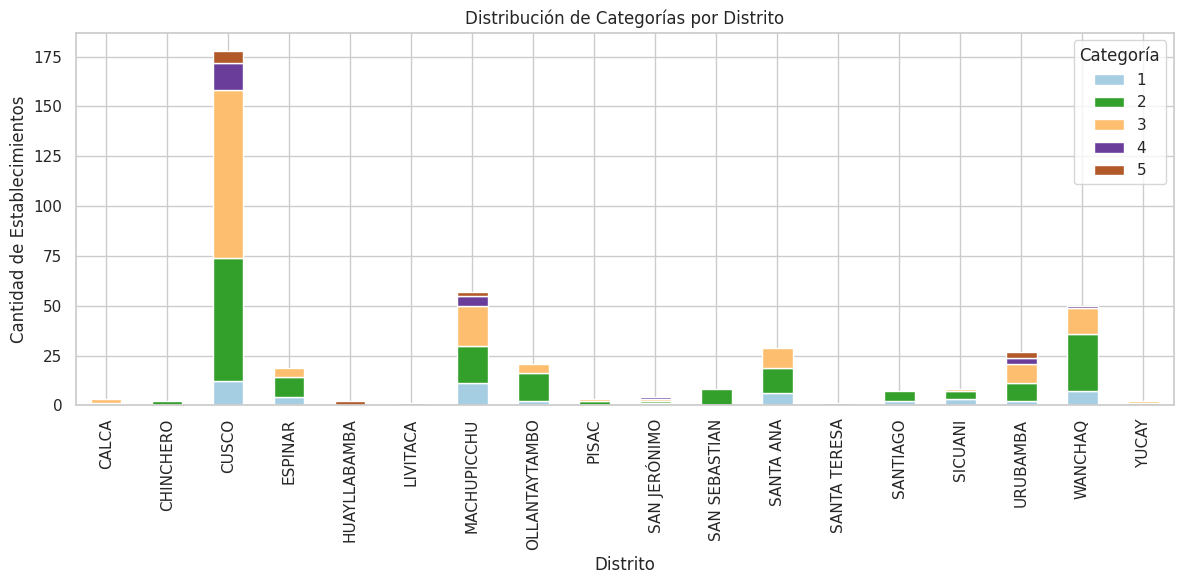

In [ ]:
dist_categoria = df_datos.groupby(["Distrito", "Categoria"]).size().unstack(fill_value=0)

dist_categoria.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Paired")
plt.title("Distribución de Categorías por Distrito")
plt.xlabel("Distrito")
plt.ylabel("Cantidad de Establecimientos")
plt.legend(title="Categoría")
plt.tight_layout()
plt.show()

<ipython-input-12-169640776d77>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=distrito_superior, x="Cantidad", y="Distrito", palette="coolwarm")


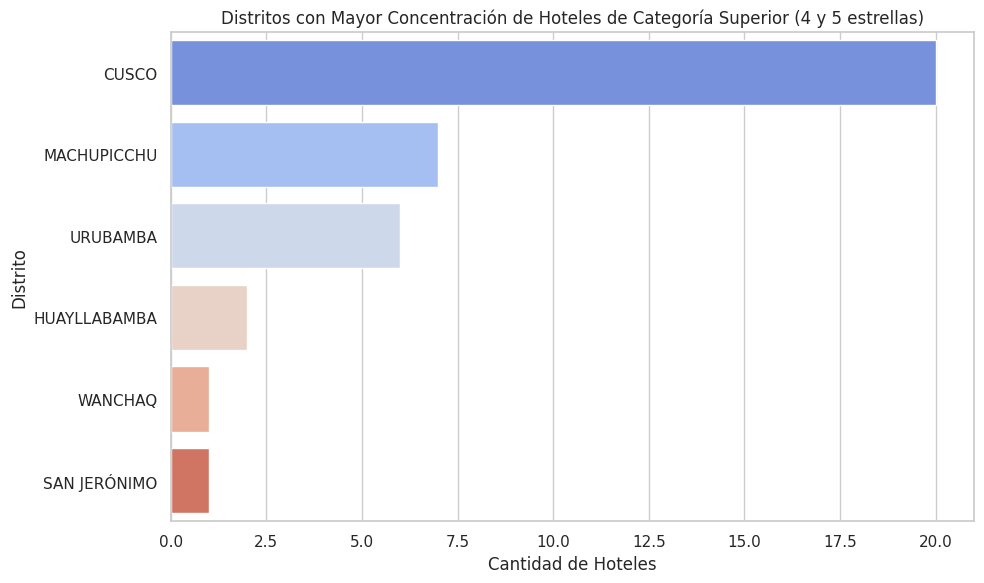

In [ ]:
superior = df_datos[df_datos["Categoria"].isin([4, 5])]

distrito_superior = superior["Distrito"].value_counts().reset_index()
distrito_superior.columns = ["Distrito", "Cantidad"]

plt.figure(figsize=(10, 6))
sns.barplot(data=distrito_superior, x="Cantidad", y="Distrito", palette="coolwarm")
plt.title("Distritos con Mayor Concentración de Hoteles de Categoría Superior (4 y 5 estrellas)")
plt.xlabel("Cantidad de Hoteles")
plt.ylabel("Distrito")
plt.tight_layout()
plt.show()

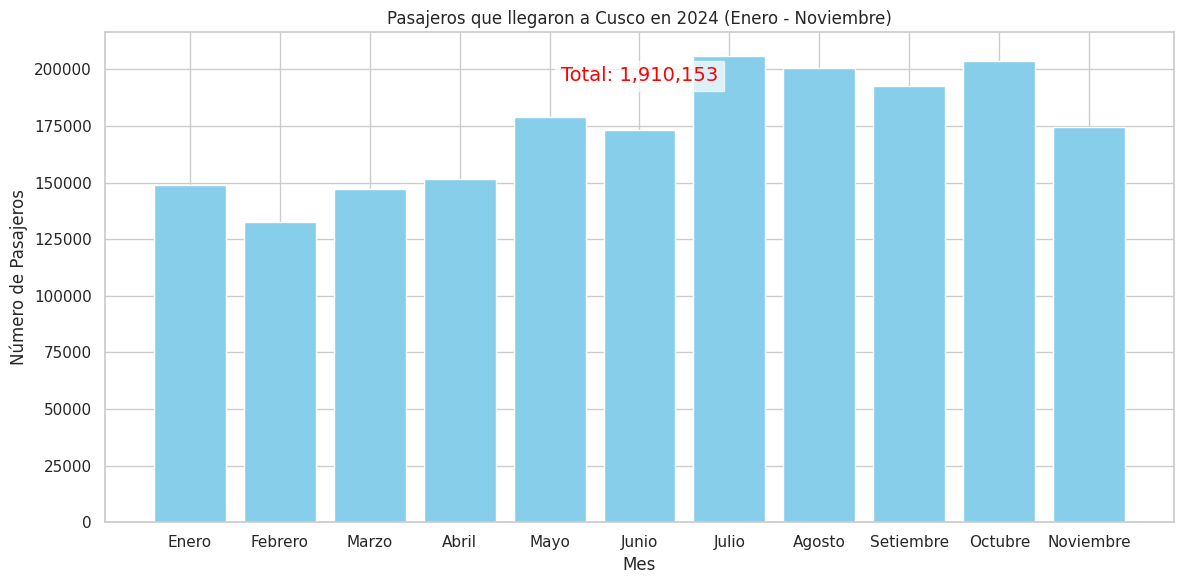

In [ ]:
meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo",
         "Junio", "Julio", "Agosto", "Setiembre", "Octubre", "Noviembre"]
pasajeros = [148776, 132661, 147345, 151403, 178934,
             173251, 206066, 200762, 192656, 203910, 174389]

total_pasajeros = sum(pasajeros)

plt.figure(figsize=(12, 6))
plt.bar(meses, pasajeros, color="skyblue")
plt.title("Pasajeros que llegaron a Cusco en 2024 (Enero - Noviembre)")
plt.xlabel("Mes")
plt.ylabel("Número de Pasajeros")

plt.text(0.5, 0.9, f"Total: {total_pasajeros:,}",
         fontsize=14, ha='center', color='red',
         bbox=dict(facecolor='white', alpha=0.7),
         transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

<ipython-input-38-f22f8f703e2f>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_capacidad, x="Escenario", y="Número de Personas", palette="coolwarm")


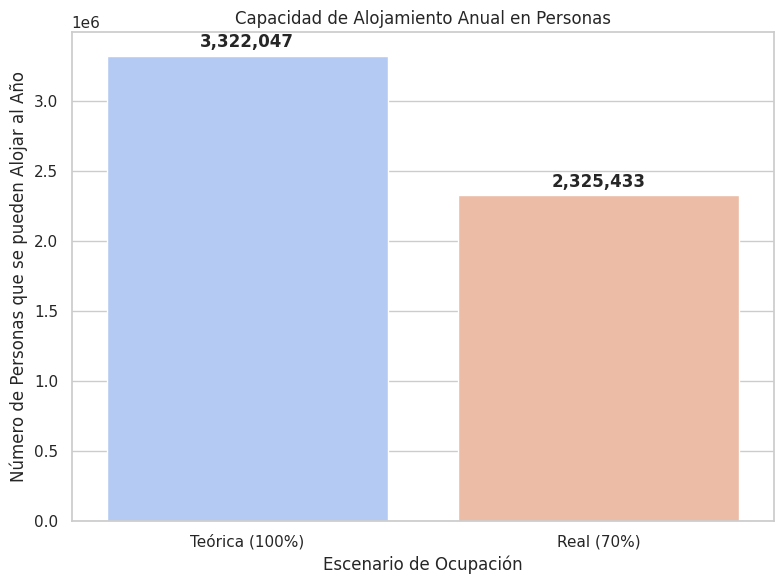

In [ ]:
total_camas = df_datos["Nro. Camas"].sum()

promedio_permanencia = 2
pernoctaciones_totales = total_camas * 365
ocupacion_factor_teorica = 1.0
personas_teoricas = (pernoctaciones_totales * ocupacion_factor_teorica) / promedio_permanencia

ocupacion_factor_real = 0.70
personas_reales = (pernoctaciones_totales * ocupacion_factor_real) / promedio_permanencia

df_capacidad = pd.DataFrame({
    "Escenario": ["Teórica (100%)", "Real (70%)"],
    "Número de Personas": [personas_teoricas, personas_reales]
})


sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_capacidad, x="Escenario", y="Número de Personas", palette="coolwarm")
plt.title("Capacidad de Alojamiento Anual en Personas")
plt.xlabel("Escenario de Ocupación")
plt.ylabel("Número de Personas que se pueden Alojar al Año")

for i, row in df_capacidad.iterrows():
    ax.text(i, row["Número de Personas"] + max(df_capacidad["Número de Personas"])*0.01,
            f'{int(row["Número de Personas"]):,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
df_estrellas1 = pd.read_csv("data/estrellas1.csv")
df_estrellas2 = pd.read_csv("data/estrellas2.csv")
df_estrellas3 = pd.read_csv("data/estrellas3.csv")
df_estrellas4 = pd.read_csv("data/estrellas4.csv")
df_estrellas5 = pd.read_csv("data/estrellas5.csv")

dfs_estrellas = [df_estrellas1, df_estrellas2, df_estrellas3, df_estrellas4, df_estrellas5]

for i, df in enumerate(dfs_estrellas):
    df_t = df.set_index('Meses').T.reset_index()
    df_t = df_t.rename(columns={'index': 'Meses'})
    df_t.columns = df_t.columns.str.strip()

    nombre_archivo = f"estrellas{i+1}_transpuesto.csv"
    df_t.to_csv(nombre_archivo, index=False)

    print(df_t.head().to_markdown(index=False, numalign="left", stralign="left"))
    print(df_t.info())
    print("\n")

| Meses   | OFERTA   | Número de establecimiento   | Número de habitaciones   | Número de plazas-cama   | INDICADORES   | TNOH en el mes(%)   | TNOC en el mes(%)   | Promedio de permanencia(días)   | Nacionales(días)   | Extranjeros(días)   | Total de arribos en el mes   | Nacionales   | Extranjeros   | Total pernoctaciones mes   | Nacionales   | Extranjeros   | Total empleo en el mes   | COBERTURA DE INFORMANTE   | En N° de establecimientos(%)   | En N° de habitaciones(%)   |
|:--------|:---------|:----------------------------|:-------------------------|:------------------------|:--------------|:--------------------|:--------------------|:--------------------------------|:-------------------|:--------------------|:-----------------------------|:-------------|:--------------|:---------------------------|:-------------|:--------------|:-------------------------|:--------------------------|:-------------------------------|:---------------------------|
| Ene     | nan      | 29           

<ipython-input-21-f27cfa1851cb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=conteo_clase, x="Clase", y="Cantidad", palette="pastel")


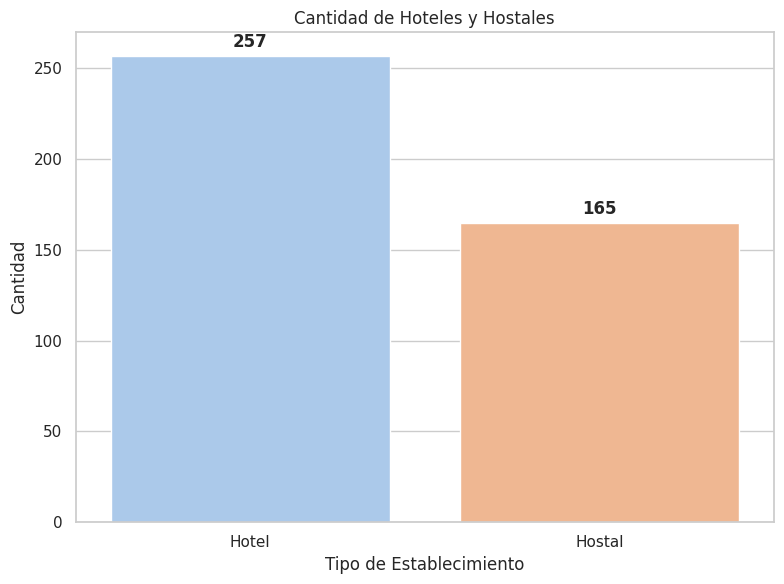

In [ ]:
conteo_clase = df_datos["Clase"].value_counts().reset_index()
conteo_clase.columns = ["Clase", "Cantidad"]

sns.set(style="whitegrid")

plt.figure(figsize=(8,6))
ax = sns.barplot(data=conteo_clase, x="Clase", y="Cantidad", palette="pastel")
plt.title("Cantidad de Hoteles y Hostales")
plt.xlabel("Tipo de Establecimiento")
plt.ylabel("Cantidad")

for i, row in conteo_clase.iterrows():
    ax.text(i, row["Cantidad"] + max(conteo_clase["Cantidad"])*0.01,
            f'{int(row["Cantidad"])}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
df_estrellas1_t = pd.read_csv("estrellas1_transpuesto.csv")
df_estrellas2_t = pd.read_csv("estrellas2_transpuesto.csv")
df_estrellas3_t = pd.read_csv("estrellas3_transpuesto.csv")
df_estrellas4_t = pd.read_csv("estrellas4_transpuesto.csv")
df_estrellas5_t = pd.read_csv("estrellas5_transpuesto.csv")

In [ ]:
print(df_datos['Nro. Habitaciones'].describe())
print(df_estrellas1_t['Número de habitaciones'].describe())
print(df_estrellas2_t['Número de habitaciones'].describe())
print(df_estrellas3_t['Número de habitaciones'].describe())
print(df_estrellas4_t['Número de habitaciones'].describe())
print(df_estrellas5_t['Número de habitaciones'].describe())

count    415.000000
mean      28.069880
std       24.064174
min        6.000000
25%       16.000000
50%       21.000000
75%       31.000000
max      203.000000
Name: Nro. Habitaciones, dtype: float64
count     11.000000
mean     542.727273
std        0.467099
min      542.000000
25%      542.500000
50%      543.000000
75%      543.000000
max      543.000000
Name: Número de habitaciones, dtype: float64
count      11.000000
mean     1948.636364
std        10.735667
min      1933.000000
25%      1944.000000
50%      1946.000000
75%      1956.000000
max      1968.000000
Name: Número de habitaciones, dtype: float64
count      11.000000
mean     3857.272727
std       183.056325
min      3465.000000
25%      3777.500000
50%      3947.000000
75%      3962.000000
max      4026.000000
Name: Número de habitaciones, dtype: float64
count      11.000000
mean     1588.818182
std        35.190391
min      1519.000000
25%      1586.500000
50%      1609.000000
75%      1609.500000
max      1610.000000
N

In [ ]:
promedios = df_datos.groupby("Clase")[["Nro. Habitaciones", "Nro. Camas"]].mean()

print("Promedios de Habitaciones y Camas por Clase:")
print(promedios)

Promedios de Habitaciones y Camas por Clase:
        Nro. Habitaciones  Nro. Camas
Clase                                
Hostal          14.427673   22.164557
Hotel           36.542969   57.425781


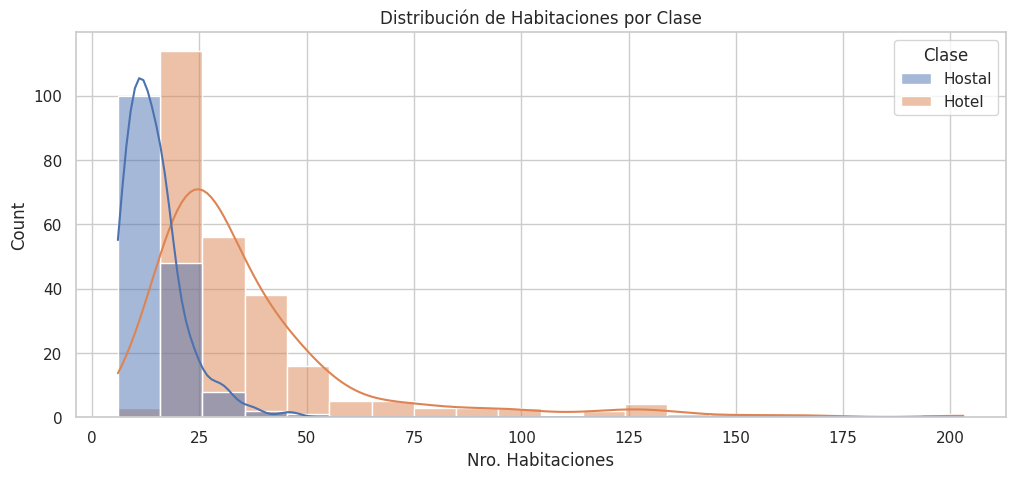

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(df_datos, x="Nro. Habitaciones", hue="Clase", kde=True, bins=20)
plt.title("Distribución de Habitaciones por Clase")
plt.show()



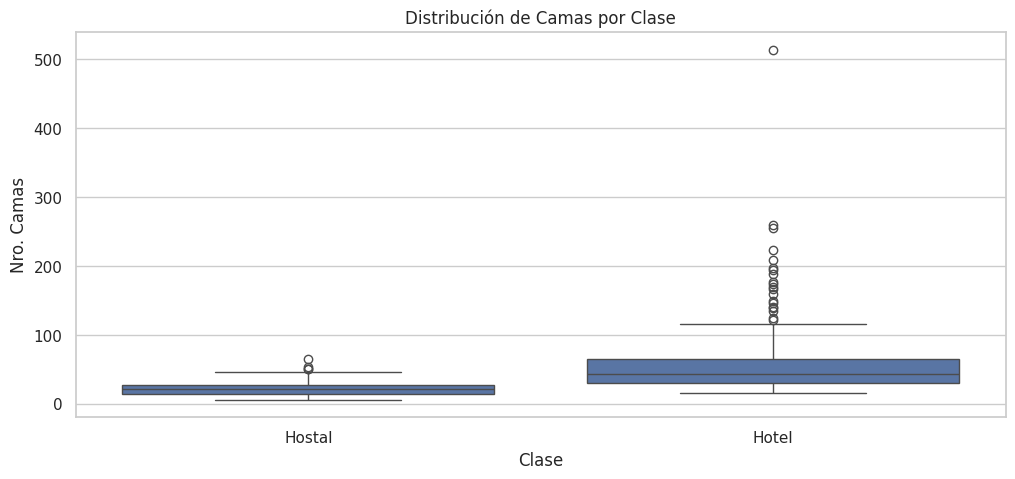

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x="Clase", y="Nro. Camas", data=df_datos)
plt.title("Distribución de Camas por Clase")
plt.show()

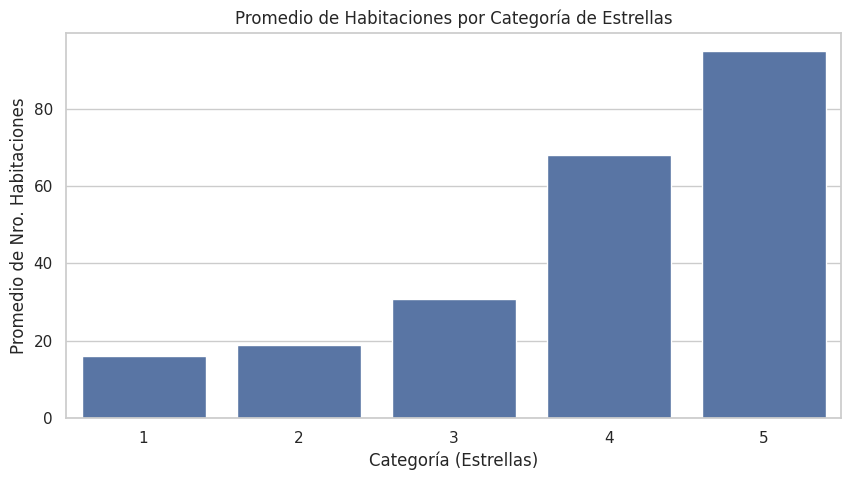

In [ ]:
promedios_estrellas = df_datos.groupby("Categoria")[["Nro. Habitaciones", "Nro. Camas"]].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=promedios_estrellas.index, y=promedios_estrellas["Nro. Habitaciones"])
plt.title("Promedio de Habitaciones por Categoría de Estrellas")
plt.xlabel("Categoría (Estrellas)")
plt.ylabel("Promedio de Nro. Habitaciones")
plt.xticks(rotation=0)
plt.show()

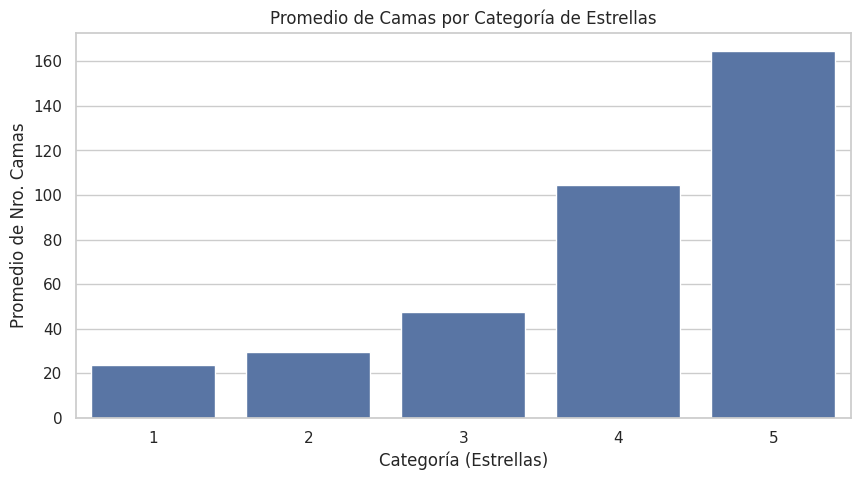

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=promedios_estrellas.index, y=promedios_estrellas["Nro. Camas"])
plt.title("Promedio de Camas por Categoría de Estrellas")
plt.xlabel("Categoría (Estrellas)")
plt.ylabel("Promedio de Nro. Camas")
plt.xticks(rotation=0)
plt.show()

In [ ]:
estrallas_transpuesto = [
    "estrellas1_transpuesto.csv",
    "estrellas2_transpuesto.csv",
    "estrellas3_transpuesto.csv",
    "estrellas4_transpuesto.csv",
    "estrellas5_transpuesto.csv",
]

for estrella in estrallas_transpuesto:
    df = pd.read_csv(estrella)
    annual_total = df["Total de arribos en el mes"].sum()
    print(f"Arribos anuales por categoria {estrella}: {annual_total}")

Arribos anuales por categoria estrellas1_transpuesto.csv: 55933.0
Arribos anuales por categoria estrellas2_transpuesto.csv: 190115.0
Arribos anuales por categoria estrellas3_transpuesto.csv: 543250.0
Arribos anuales por categoria estrellas4_transpuesto.csv: 396478.0
Arribos anuales por categoria estrellas5_transpuesto.csv: 283174.0


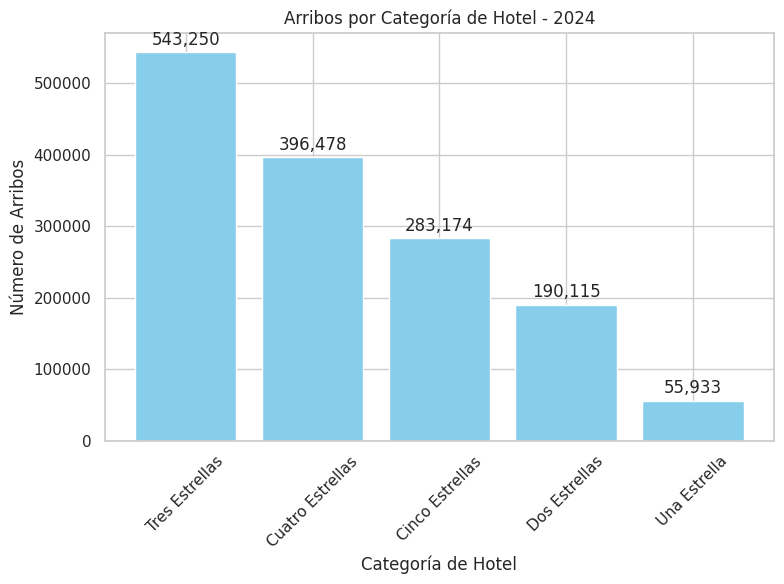

In [ ]:
data_arribos = {
    "Año": [2024, 2024, 2024, 2024, 2024],
    "Categoria": ["Cinco Estrellas", "Cuatro Estrellas", "Tres Estrellas", "Dos Estrellas", "Una Estrella"],
    "Arribos": [283174, 396478, 543250, 190115, 55933]
}

df_estribos = pd.DataFrame(data_arribos)
df_estribos = df_estribos.sort_values(by="Arribos", ascending=False)

plt.figure(figsize=(8,6))
plt.bar(df_estribos["Categoria"], df_estribos["Arribos"], color='skyblue')
plt.xlabel("Categoría de Hotel")
plt.ylabel("Número de Arribos")
plt.title("Arribos por Categoría de Hotel - 2024")
plt.xticks(rotation=45)

for index, row in df_estribos.iterrows():
    plt.text(row["Categoria"], row["Arribos"] + 5000, f"{row['Arribos']:,}", ha='center', va='bottom')

plt.tight_layout()
plt.show()